In [33]:
import pandas as pd
from Bio import SeqIO
from Bio.Alphabet import generic_protein
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import fcluster


import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
orf1ab_seqs = list(SeqIO.parse('./data/coronavirus_orf1ab.fasta','fasta',alphabet=generic_protein))
orf1ab_meta = pd.read_csv("./data/coronavirus_orf1ab_meta.csv")

In [164]:
d={ 'Accession':[], 'Sequence':[]}
for s in orf1ab_seqs:
    d['Accession'].append(s.name.strip())
    d['Sequence'].append(str(s.seq))

df_seq = pd.DataFrame(d)

df_seq = df_seq.drop_duplicates()

df_seq = df_seq[df_seq.Sequence.apply(lambda s: not s.startswith("L"))].copy()

In [165]:
orf1ab_meta = orf1ab_meta.drop_duplicates()
orf1ab_meta

,Accession,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date,GenBank_Title
0,YP_009724389,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,China,Homo sapiens,NaN,2019-12,orf1ab polyprotein [Severe acute respiratory s...
1,YP_009555238,2019-02-21T00:00:00Z,Betacoronavirus 1,7095,USA,NaN,NaN,NaN,Orf1ab [Human coronavirus OC43]
2,YP_002308478,2018-08-24T00:00:00Z,Bulbul coronavirus HKU11,6264,Hong Kong,Pycnonotus jocosus,NaN,2007-01,orf1ab polyprotein [Bulbul coronavirus HKU11-934]
3,YP_009513008,2018-08-24T00:00:00Z,Hedgehog coronavirus 1,7150,Germany,Erinaceus europaeus,feces,2012,orf1ab [Betacoronavirus Erinaceus/VMC/DEU/2012]
4,YP_009513020,2018-08-24T00:00:00Z,Coronavirus HKU15,6267,China: Hong Kong,Sus scrofa,NaN,2010,replicase polyprotein [Porcine coronavirus HKU15]
...,...,...,...,...,...,...,...,...,...
2711,QIU78777,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,Spain,Homo sapiens,NaN,2020-03-10,ORF1ab polyprotein [Severe acute respiratory s...
2712,QIU78717,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,Spain,Homo sapiens,NaN,2020-03-10,ORF1ab polyprotein [Severe acute respiratory s...
2713,QIU78705,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,Spain,Homo sapiens,NaN,2020-03-09,ORF1ab polyprotein [Severe acute respiratory s...
2714,QIU78741,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,Spain,Homo sapiens,NaN,2020-03-10,ORF1ab polyprotein [Severe acute respiratory s...


In [166]:
df = df_seq.merge(orf1ab_meta, on='Accession', how='left')
df

,Accession,Sequence,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date,GenBank_Title
0,YP_009724389,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,China,Homo sapiens,NaN,2019-12,orf1ab polyprotein [Severe acute respiratory s...
1,YP_009555238,MSKINKYGLELHWAPEFPWMFEDAEEKLDNPSSSEVDMICSTTAQK...,2019-02-21T00:00:00Z,Betacoronavirus 1,7095,USA,NaN,NaN,NaN,Orf1ab [Human coronavirus OC43]
2,YP_002308478,MVKNVSKRSPIVLPQIQPPPLQLFIAVAAAEEGHPKDLKYLGNYNL...,2018-08-24T00:00:00Z,Bulbul coronavirus HKU11,6264,Hong Kong,Pycnonotus jocosus,NaN,2007-01,orf1ab polyprotein [Bulbul coronavirus HKU11-934]
3,YP_009513008,MSSATGEGSQGARATYRAALNNEKRHDHVALTVPCCGTEAKVTALS...,2018-08-24T00:00:00Z,Hedgehog coronavirus 1,7150,Germany,Erinaceus europaeus,feces,2012,orf1ab [Betacoronavirus Erinaceus/VMC/DEU/2012]
4,YP_009513020,MAKNKSKRDAIALPENVPPPLQLFIHVAAAEEGHPKVTTYLGNYNL...,2018-08-24T00:00:00Z,Coronavirus HKU15,6267,China: Hong Kong,Sus scrofa,NaN,2010,replicase polyprotein [Porcine coronavirus HKU15]
...,...,...,...,...,...,...,...,...,...,...
2709,QIU78777,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,Spain,Homo sapiens,NaN,2020-03-10,ORF1ab polyprotein [Severe acute respiratory s...
2710,QIU78717,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,Spain,Homo sapiens,NaN,2020-03-10,ORF1ab polyprotein [Severe acute respiratory s...
2711,QIU78705,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,Spain,Homo sapiens,NaN,2020-03-09,ORF1ab polyprotein [Severe acute respiratory s...
2712,QIU78741,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,7096,Spain,Homo sapiens,NaN,2020-03-10,ORF1ab polyprotein [Severe acute respiratory s...


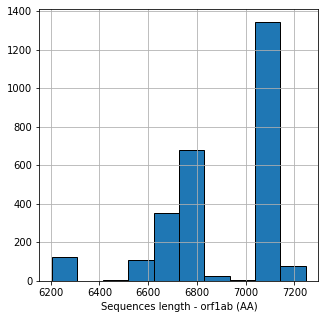

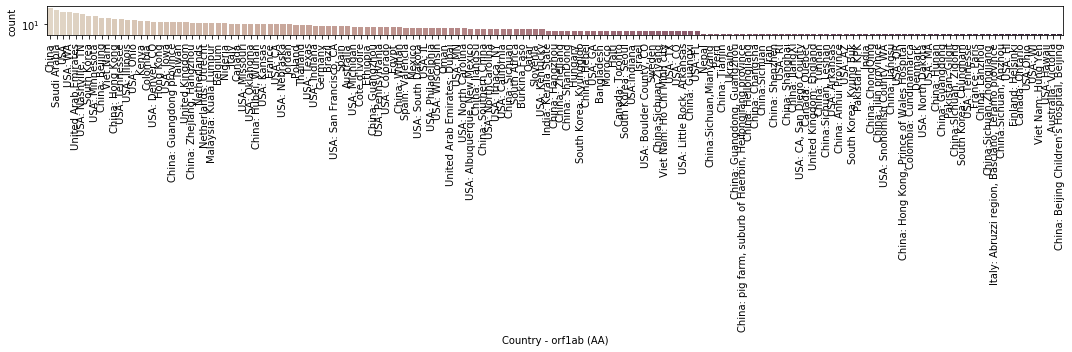

<Figure size 432x288 with 0 Axes>

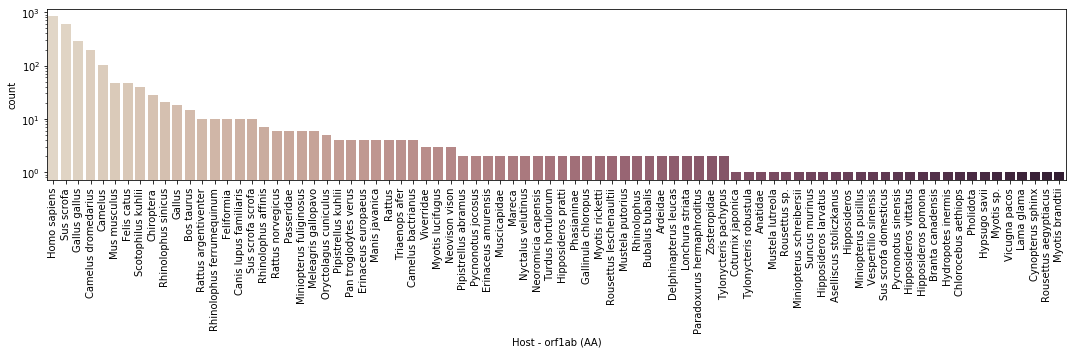

In [174]:
fig, ax = plt.subplots(1, figsize=(5,5))
g1 = df.Length.hist(ax = ax, edgecolor="k")
g1.set_xlabel('Sequences length - orf1ab (AA)')
plt.savefig("../covid_noise/ML/test/orf1ab_lengths_beta_proteins.pdf")
#plt.savefig("lengths.png", dpi=600)

## I'll group countries ignoring second-level data.
## Losing some information to provide better visualization

##by country
fig, ax = plt.subplots(1, figsize=(15,5))
chart = sns.countplot(x="Geo_Location", palette="ch:.25", data=df, ax=ax,
                     order = df['Geo_Location'].value_counts().index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Country - orf1ab (AA)')
chart.set_yscale("log")

plt.tight_layout()
plt.savefig("../covid_noise/ML/test/orf1ab_countries_beta_proteins.pdf")
plt.show()


#########
plt.clf()

##by host
fig, ax = plt.subplots(1, figsize=(15,5))
chart = sns.countplot(x="Host", palette="ch:.25", data=df, ax=ax,
                     order = df['Host'].value_counts().index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Host - orf1ab (AA)')
chart.set_yscale("log")

plt.tight_layout()
plt.savefig("../covid_noise/ML/test/orf1ab_host_beta_proteins.pdf")
plt.show()

In [175]:
### new columns
df['Protein'] = df.GenBank_Title.apply(lambda s: s.split("[")[0].strip())
df[df.Protein == 'orf1ab polyprotein, partial']

df['Country'] = df.Geo_Location.apply(lambda s: s.split(':')[0] if isinstance(s, str) else s )

df['Host_agg'] = df.Host.apply(lambda s: s.split(" ")[0] if isinstance(s, str) else s )

In [176]:
proteomes = df.Sequence.copy()

kmer_len = 4

#let's keep the original indexing to allow lookups from the starting data
corpus = []
ordered_indexes = [] #probably overkill, but let's avoid forgetting the indexes to retrieve metadata

for i, seq in proteomes.iteritems():
    ordered_indexes.append(i)
    corpus.append([seq[j:j+kmer_len] for j in np.arange(0, len(seq)-kmer_len)])
    
#All that is required is that the input yields one sentence (list of utf8 words) after another.
#it takes around 40 seconds

In [177]:
from gensim.models import Word2Vec

size= 100
tot_epochs= 20
perplexity=500
n_iter = 1000

model = Word2Vec(sentences=corpus, min_count=1, size=size, iter=tot_epochs)

# Visualization
## summarize sentences (genomes) by making word means (or sum, whatever, their length is pretty much the same) and tSNE the results

#### make it as colors/labels are interchangeable

In [178]:
from sklearn.decomposition import IncrementalPCA    # initial reduction
from sklearn.manifold import TSNE                   # final reduction

def reduce_dimensions(model, ordered_indexes, corpus, df=df, label="Species",
                     perplexity=30, n_iter = 500):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)
    
    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later

    for i, sentence in zip(ordered_indexes, corpus):

        vectors.append(np.mean([model.wv[word] for word in sentence], axis=0))
        labels.append(df.iloc[i][label])
        
    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=perplexity, n_iter=n_iter)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [179]:
x_vals, y_vals, labels = reduce_dimensions(model, ordered_indexes, corpus, 
                                                         label="Protein",
                                           perplexity =perplexity, n_iter=n_iter)

In [180]:
from sklearn import preprocessing

def plot_with_matplotlib(x_vals, y_vals, labels, color_labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    le = preprocessing.LabelEncoder()
    le.fit(color_labels)
    cmappable_labels = le.transform(color_labels)
    
    fig, ax = plt.subplots(1, figsize=(10, 10))
    unique = np.unique(color_labels)
    colors = [plt.cm.rainbow(i/float(len(unique)-1)) for i in range(len(unique))]
    for i, u in enumerate(unique):
        xi = [x_vals[j] for j  in range(len(x_vals)) if color_labels[j] == u]
        yi = [y_vals[j] for j  in range(len(x_vals)) if color_labels[j] == u]
        
        edgecolor =None
        if u == "Homo":
            edgecolor ='k'
        elif u == "Felis":
            edgecolor ='r'
        plt.scatter(xi, yi, c=(colors[i],), label=str(u), edgecolor=edgecolor)
        
    plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
    
    selected_indices = [i for i,s in enumerate(labels) if "coronavirus 2" in s]
    for i in selected_indices:
        plt.annotate('°', (x_vals[i], y_vals[i]))
    
    return fig,ax

In [181]:
geo_labels = []
date_labels = []
host_labels = []
host_agg_labels = []
gen_bank_labels = []
for i, sentence in zip(ordered_indexes, corpus):
    geo_labels.append(df.iloc[i]['Country'])
    date_labels.append(df.iloc[i]['Release_Date'])
    host_labels.append(df.iloc[i]['Host'])
    host_agg_labels.append(df.iloc[i]['Host_agg'])
    gen_bank_labels.append(df.iloc[i]['GenBank_Title'])


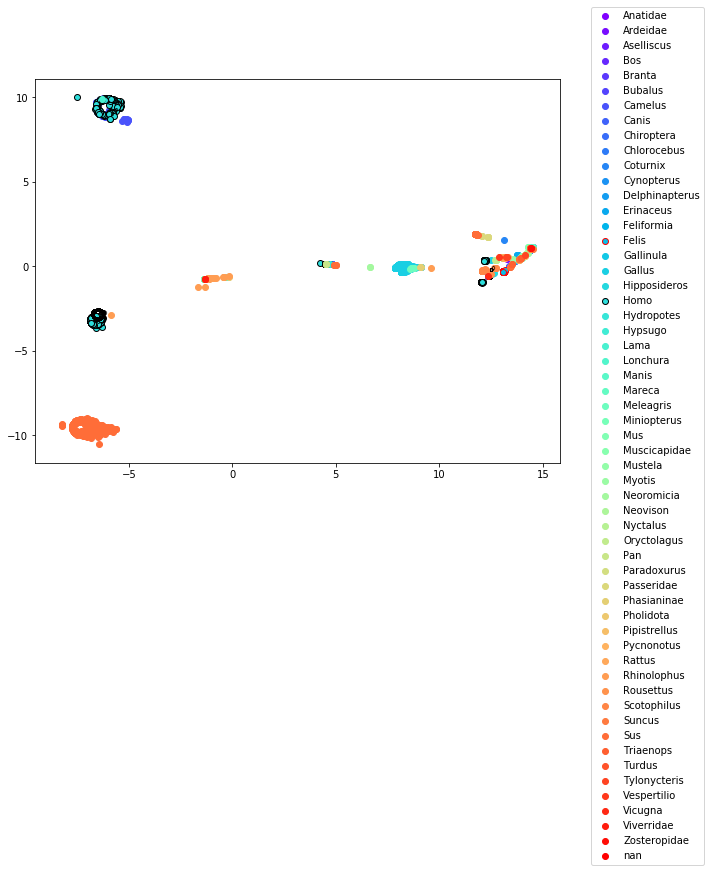

In [182]:
##color_labels
_,_= plot_with_matplotlib(x_vals, y_vals, gen_bank_labels, host_agg_labels)
plt.tight_layout()
plt.savefig(f"../covid_noise/ML/test/tsne_orf1ab_w2vsize_{size}_epochs_{tot_epochs}_perpl_{perplexity}.pdf")

##TODO remove nan, plot with different labels - aggregate hosts

## Trees

In [183]:
#get embedded vectors for other usages
vecs=[]
for i, sentence in zip(ordered_indexes, corpus):

    vecs.append(np.mean([model.wv[word] for word in sentence], axis=0))

In [184]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
dm = pdist(vecs, 'cosine') # X è il vettore dei vettori di embedding
method = 'ward'
Z = linkage(dm, method=method, metric='cosine', optimal_ordering=False)

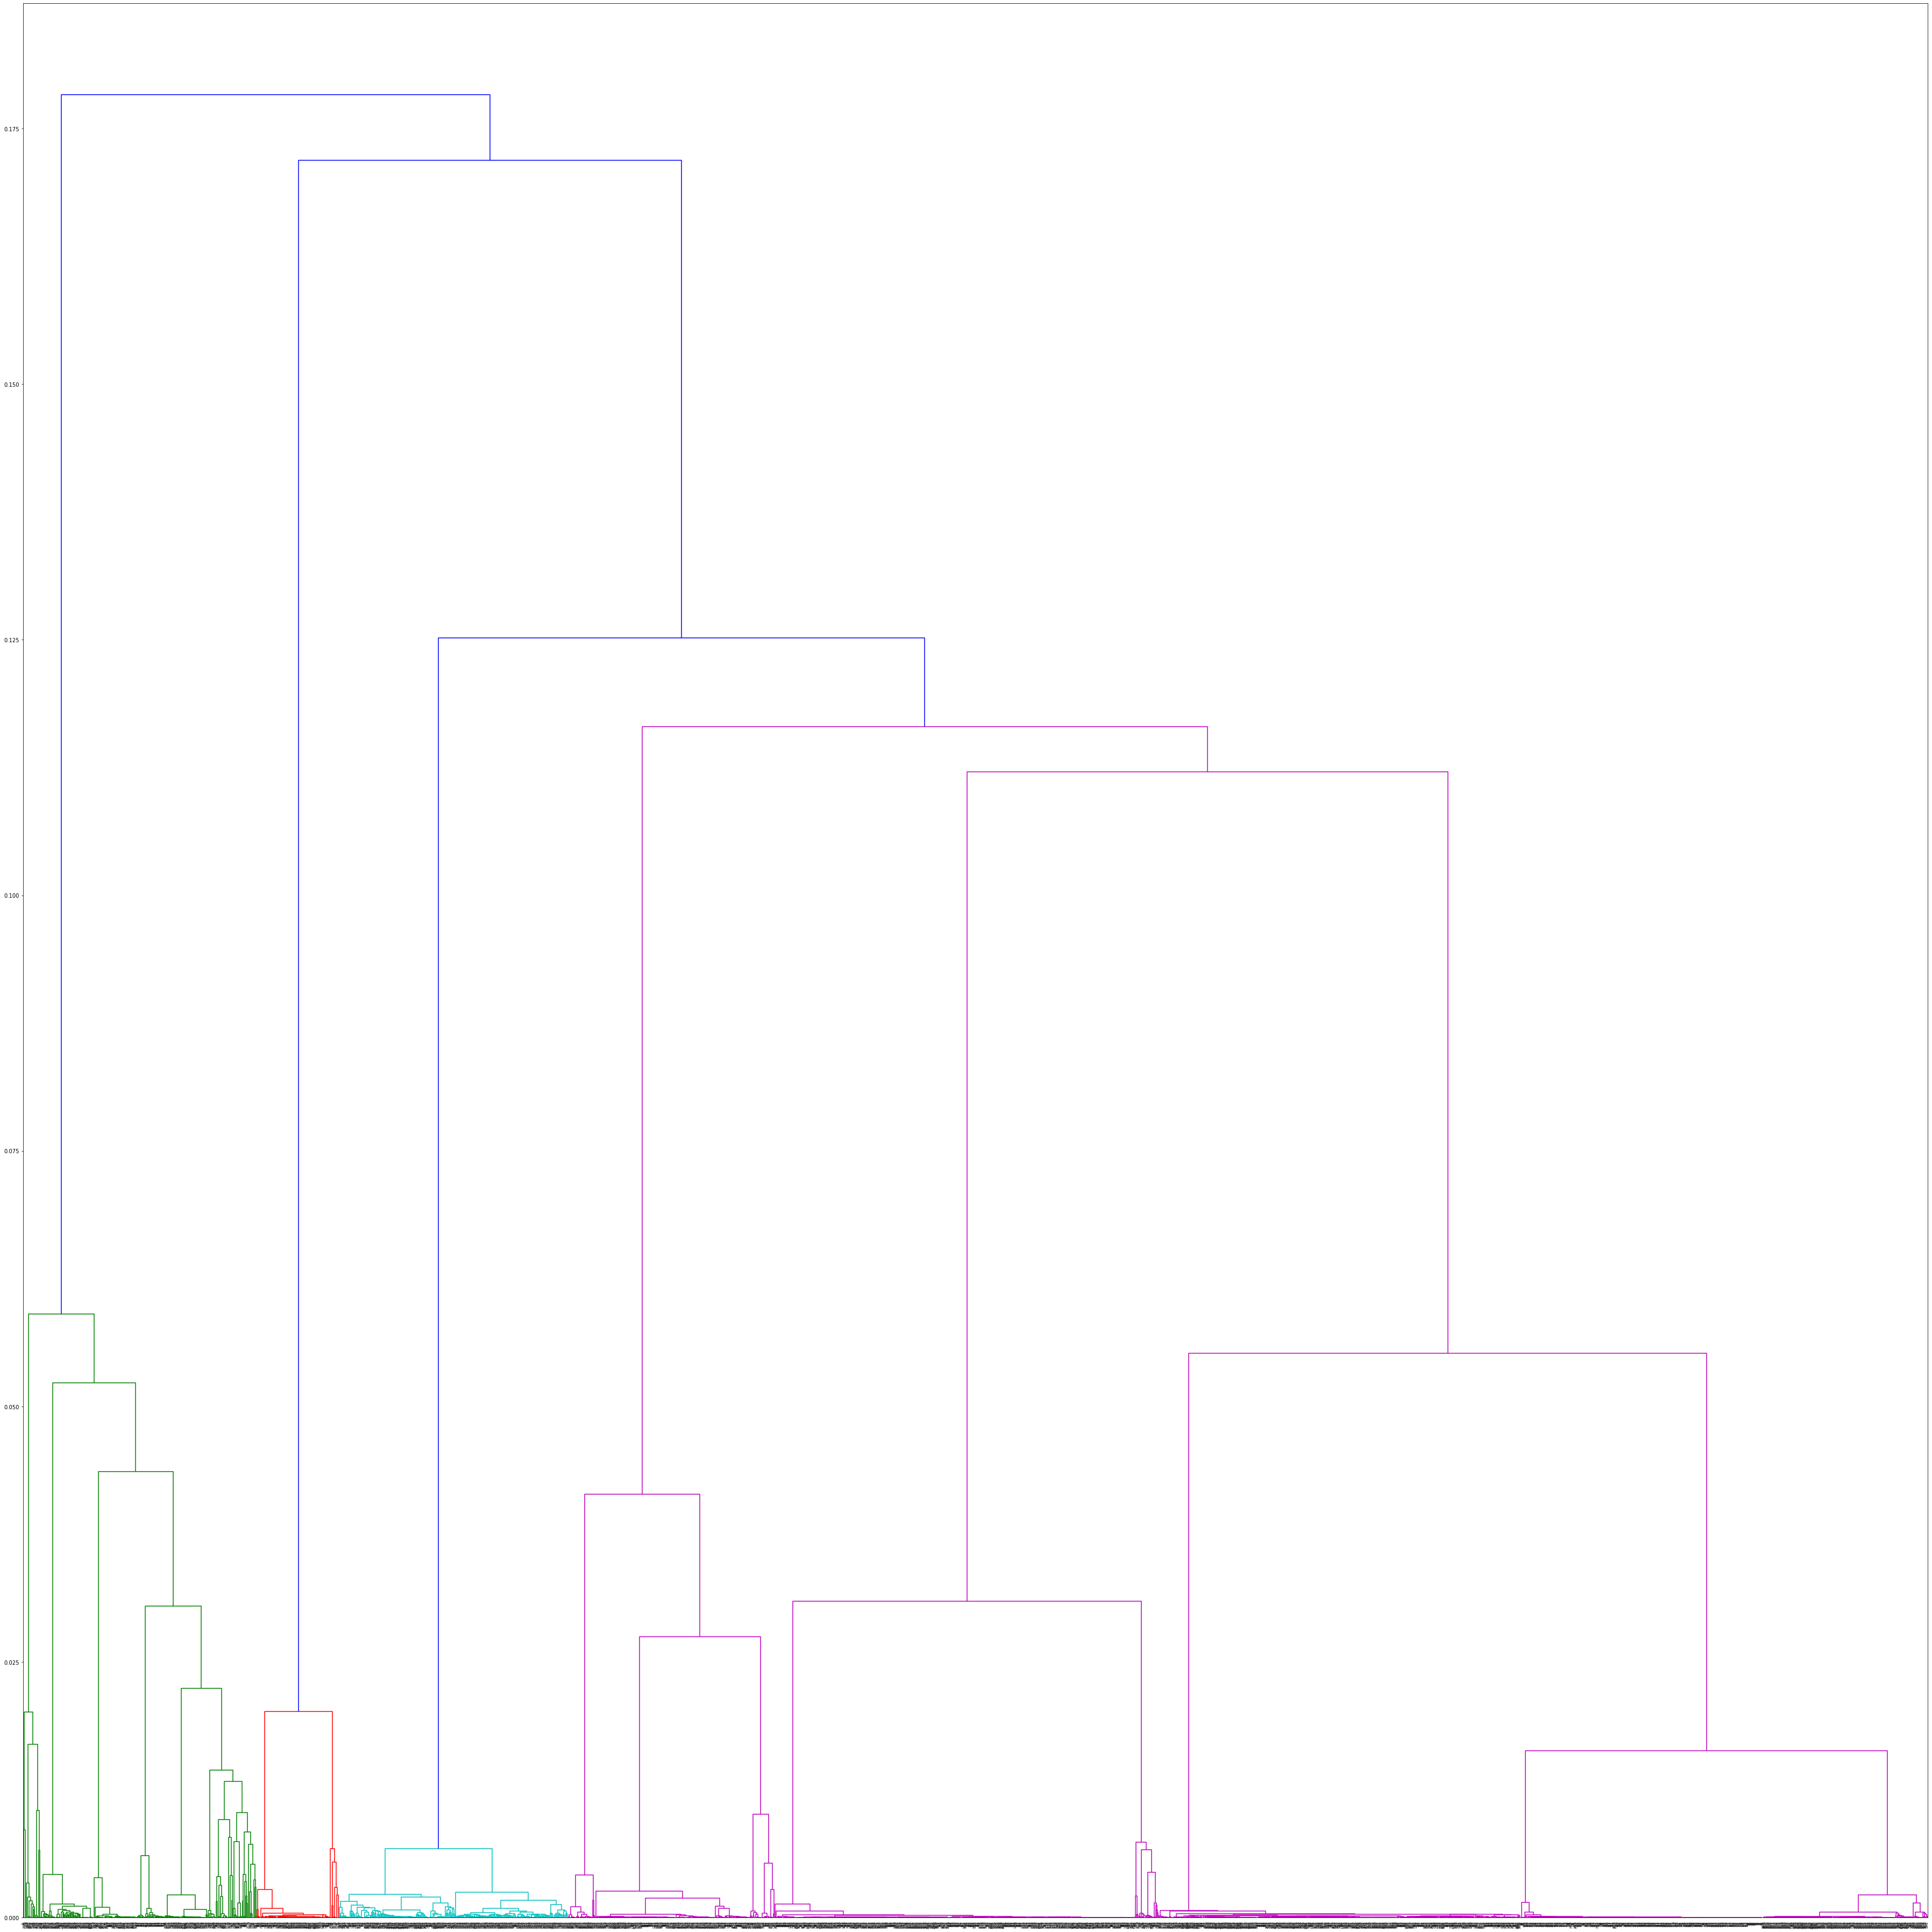

In [185]:
fig, ax = plt.subplots(1, figsize=(50,50))
dendrogram(Z,
            orientation='top',
            labels=None,
            distance_sort='descending',
              ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("../covid_noise/ML/test/tree.test.pdf")

In [186]:
def get_clusters(linkage, numclust, labels, norm=True):
    """extracts numclust clusters from the linkage matrix
    if norm: True returns the fraction with respect to the total number of points with the same label"""
    d = {}
    totals = {}
    fl = fcluster(linkage,numclust,criterion='maxclust')
    labs = np.array(labels)
    
    unique_elements, counts_elements = np.unique(labs, return_counts=True)
    for host, counts in zip(unique_elements, counts_elements):
        totals[host] = counts
    
    for i in np.arange(1, numclust+1):
        d[i] = {}
        uniq, cnt = np.unique(labs[fl == i], return_counts=True)
        for host, counts in zip(uniq, cnt):
            if totals[host] > 5:
                d[i][host] = counts/totals[host]
    return d

numclust = 5       
get_clusters(Z, numclust, gen_bank_labels)

{1: {'ORF1ab [Camel alphacoronavirus Camel229E]': 1.0,
  'ORF1ab [Human coronavirus NL63]': 1.0,
  'orf1ab polyprotein [Feline coronavirus]': 1.0,
  'orf1ab polyprotein [Hipposideros bat coronavirus HKU10]': 1.0,
  'polyprotein 1ab [Feline coronavirus]': 1.0,
  'polyprotein ORF1ab [Camel alphacoronavirus]': 1.0,
  'replicase [Feline coronavirus]': 1.0,
  'replicase polyprotein 1ab [Human coronavirus 229E]': 1.0,
  'replicase polyprotein 1ab [Human coronavirus NL63]': 1.0,
  'replicase polyprotein [Alphacoronavirus sp.]': 1.0,
  'replicase polyprotein orf1ab [Human coronavirus NL63]': 1.0},
 2: {'polyprotein 1ab [Porcine deltacoronavirus]': 1.0,
  'polyprotein [Porcine deltacoronavirus]': 1.0,
  'replicase polyprotein [Porcine coronavirus HKU15]': 1.0,
  'replicase polyprotein [Porcine deltacoronavirus]': 1.0},
 3: {'1ab polyprotein [Infectious bronchitis virus]': 1.0,
  '1ab protein [Infectious bronchitis virus]': 1.0,
  'ORF 1ab [Infectious bronchitis virus]': 1.0,
  'ORF1ab [Infectio

In [173]:
df[df.Host.isnull()]

,Accession,Sequence,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date,GenBank_Title
1,YP_009555238,MSKINKYGLELHWAPEFPWMFEDAEEKLDNPSSSEVDMICSTTAQK...,2019-02-21T00:00:00Z,Betacoronavirus 1,7095,USA,NaN,NaN,NaN,Orf1ab [Human coronavirus OC43]
29,YP_004070193,MSSKQFKILVNEDYQVNVPSLPFRDALQEIKYCYRNGFDGYVFVPE...,2010-12-17T00:00:00Z,Alphacoronavirus 1,6709,USA,NaN,NaN,NaN,polyprotein ab [Feline infectious peritonitis ...
35,YP_001718610,MGSNHLTLAFASDSEISASGCSTREEAVSRYSEAAIYGFENCRFVA...,2008-03-13T00:00:00Z,Miniopterus bat coronavirus HKU8,6896,Hong Kong,NaN,NaN,NaN,ORF1ab polyprotein [Miniopterus bat coronaviru...
36,YP_001718603,MSSNLVTLAFASDSEISAEGFCDVSSAVYAFSVSAANGFTDCRFVA...,2008-03-13T00:00:00Z,Bat coronavirus 1A,6932,Hong Kong,NaN,NaN,NaN,ORF1ab polyprotein [Bat coronavirus 1A]
37,YP_001552234,MSINQLTLAVASDQEISAHGYPTMSDAVEHFSSSASHGFKDCRFVA...,2007-11-20T00:00:00Z,Rhinolophus bat coronavirus HKU2,6727,NaN,NaN,NaN,NaN,orf1ab polyprotein [Rhinolophus bat coronaviru...
...,...,...,...,...,...,...,...,...,...,...
2702,AAP13566,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,2003-04-18T00:00:00Z,Severe acute respiratory syndrome-related coro...,7073,"China: Hong Kong, Prince of Wales Hospital",NaN,NaN,NaN,putative orf1ab polyprotein [SARS coronavirus ...
2703,AAL57305,MSKINKYGLELHWAPEFPWMFEDAEEKLDNPSSSEVDIVCSTTAQK...,2002-01-02T00:00:00Z,Betacoronavirus 1,7094,NaN,NaN,NaN,NaN,replicase [Bovine coronavirus]
2704,AAK83365,MSKINKYGLELHWAPEFPWMFEDAEEKLDNPSSSEVDIVCSTTAQK...,2001-08-02T00:00:00Z,Betacoronavirus 1,7094,NaN,NaN,NaN,NaN,replicase [Bovine coronavirus]
2705,AAK38661,MASNHVTLAFANDAEISAFGFCTASEAVSYYSEAAASGFMQCRFVS...,2001-04-23T00:00:00Z,Porcine epidemic diarrhea virus,6781,NaN,NaN,NaN,NaN,Pol1 [Porcine epidemic diarrhea virus]
